# Simple Hill Climb

In [2]:
import random
import numpy as np

In [3]:
#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)):
            #print(coordinate[i])
            p = np.linalg.norm(coordinate[i] - coordinate[j])    # Euclidean Distance --> (abs(a)**2 + abs(a)**2 + ...)**(1/2)
            #print(p)
            matrix.append(p)      # 1 * 11 size (row x col)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))    # 11 x 11 size
    print(matrix)
    return matrix

#finds a random solution
def solution(matrix):
    points = list(range(0, len(matrix)))    #  1 x 11 size (row x col), values starting from zero, list of indices
    print("Inside Solution")
    random.shuffle(points)
    print("Shuffled Points: ", points)
    return points   # Returns the randomly shuffled list.


# calculate the total distance of path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]] # matrix[solution[0]][solution[-1]], matrix[solution[1]][solution[0]]
    return cycle_length

# generate neighbors of the random solution by swapping cities and returns the best neighbor
def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)
    print(len(neighbors)) # num of rows
    num_cols = len(neighbors[0]) if neighbors else 0
    print(num_cols)
    # assume that the first neighbor in the list is the best neighbor
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)

    #check if there is a better neighbor
    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path


def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)    #generate the adjacency matrix

    current_solution = solution(matrix)     #Gets a random initial solution and its path length.
    current_path = path_length(matrix, current_solution)
    print("Path Length ", current_path)

    time_complexity = 0
    space_complexity = len(current_solution)

    neighbor = neighbors(matrix,current_solution)[0]        #Calls neighbors to examine neighboring solutions
    best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = neighbors(matrix, current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

        time_complexity += 1
        space_complexity = max(space_complexity, len(neighbor))

    return current_solution, current_path, time_complexity, space_complexity

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(solution, title):
    G = nx.DiGraph()
    for i in range(len(solution)):
        G.add_edge(solution[i], solution[(i+1)%len(solution)])
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, arrows=True)
    plt.title(title)
    plt.show()


[[ 0.          2.          4.12310563  6.08276253  7.07106781 12.20655562
  25.05992817 19.79898987 19.23538406 17.11724277 28.28427125]
 [ 2.          0.          2.23606798  6.08276253  7.61577311 10.63014581
  23.32380758 18.43908891 19.02629759 17.         26.90724809]
 [ 4.12310563  2.23606798  0.          5.83095189  7.81024968  8.48528137
  21.09502311 16.40121947 18.02775638 16.1245155  24.8394847 ]
 [ 6.08276253  6.08276253  5.83095189  0.          2.23606798  9.05538514
  21.84032967 15.26433752 13.15294644 11.04536102 23.60084744]
 [ 7.07106781  7.61577311  7.81024968  2.23606798  0.         11.
  23.53720459 16.55294536 12.64911064 10.44030651 24.69817807]
 [12.20655562 10.63014581  8.48528137  9.05538514 11.          0.
  13.          8.06225775 13.89244399 12.80624847 16.40121947]
 [25.05992817 23.32380758 21.09502311 21.84032967 23.53720459 13.
   0.          8.24621125 20.24845673 20.61552813  8.24621125]
 [19.79898987 18.43908891 16.40121947 15.26433752 16.55294536  8.

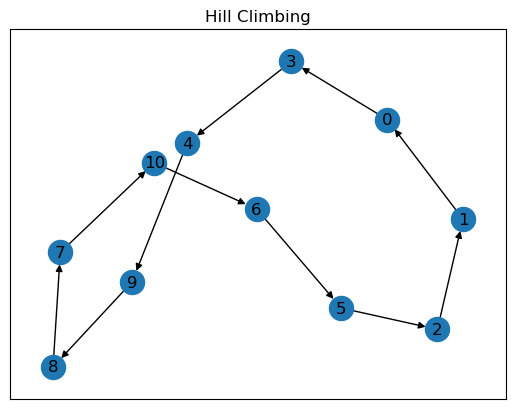

In [5]:
#coordinate of the points/cities
coordinate = np.array([[1, 2], [1, 4], [2, 6], [7, 3], [8, 1], [8, 12], [13, 24], [15, 16], [20, 5], [18, 4], [21, 22]])

best_solution, best_path, time_complexity, space_complexity = hill_climbing(coordinate)
print("The best path is \n", best_solution)
print("The length of the best path is ", best_path)
print("Time Complexity: ", time_complexity)
print("Space Complexity: ", space_complexity)
draw_graph(best_solution, "Hill Climbing")

# First Search

In [6]:
import random
import numpy as np

In [7]:
#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)):
            #print(coordinate[i])
            p = np.linalg.norm(coordinate[i] - coordinate[j])    # Euclidean Distance --> (abs(a)**2 + abs(a)**2 + ...)**(1/2)
            #print(p)
            matrix.append(p)      # 1 * 11 size (row x col)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))    # 11 x 11 size
    print(matrix)
    return matrix

#finds a random solution
def solution(matrix):
    points = list(range(0, len(matrix)))    #  1 x 11 size (row x col), values starting from zero
    print("Inside Solution")
    random.shuffle(points)
    print("Shuffled Points: ", points)
    return points


# calculate the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]] # matrix[solution[0]][solution[-1]], matrix[solution[1]][solution[0]]
    return cycle_length

# As soon as a swap results in a shorter path, it immediately returns this improved neighbor
def first_choice_neighbors(matrix, solution):
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            current_path = path_length(matrix, neighbor)
            if current_path < path_length(matrix, solution):
                return neighbor, current_path
    return solution, path_length(matrix, solution)


def first_choice_hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)

    current_solution = solution(matrix) # shuffle points
    current_path = path_length(matrix, current_solution)
    print("Path Length ", current_path)

    time_complexity = 0
    space_complexity = len(current_solution)

    neighbor, neighbor_path = first_choice_neighbors(matrix, current_solution)

    while neighbor_path < current_path:
        current_solution = neighbor
        current_path = neighbor_path
        neighbor, neighbor_path = first_choice_neighbors(matrix, current_solution)

        time_complexity += 1
        space_complexity = max(space_complexity, len(neighbor))

    return current_solution, current_path, time_complexity, space_complexity

[[ 0.          2.          4.12310563  6.08276253  7.07106781 12.20655562
  25.05992817 19.79898987 19.23538406 17.11724277 28.28427125]
 [ 2.          0.          2.23606798  6.08276253  7.61577311 10.63014581
  23.32380758 18.43908891 19.02629759 17.         26.90724809]
 [ 4.12310563  2.23606798  0.          5.83095189  7.81024968  8.48528137
  21.09502311 16.40121947 18.02775638 16.1245155  24.8394847 ]
 [ 6.08276253  6.08276253  5.83095189  0.          2.23606798  9.05538514
  21.84032967 15.26433752 13.15294644 11.04536102 23.60084744]
 [ 7.07106781  7.61577311  7.81024968  2.23606798  0.         11.
  23.53720459 16.55294536 12.64911064 10.44030651 24.69817807]
 [12.20655562 10.63014581  8.48528137  9.05538514 11.          0.
  13.          8.06225775 13.89244399 12.80624847 16.40121947]
 [25.05992817 23.32380758 21.09502311 21.84032967 23.53720459 13.
   0.          8.24621125 20.24845673 20.61552813  8.24621125]
 [19.79898987 18.43908891 16.40121947 15.26433752 16.55294536  8.

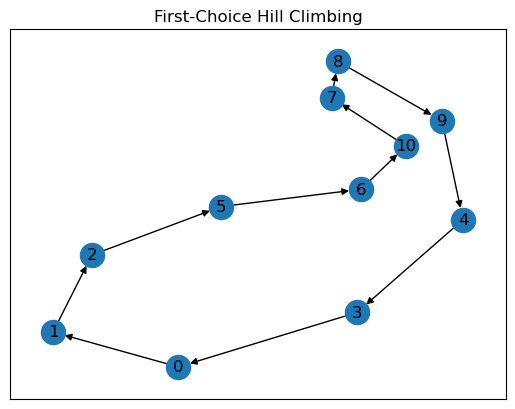

In [8]:
#coordinate of the points/cities
coordinate = np.array([[1, 2], [1, 4], [2, 6], [7, 3], [8, 1], [8, 12], [13, 24], [15, 16], [20, 5], [18, 4], [21, 22]])

best_solution, best_path, time_complexity, space_complexity = first_choice_hill_climbing(coordinate)

print("The best path is \n", best_solution)
print("The length of the best path is ", best_path)
print("Time Complexity: ", time_complexity)
print("Space Complexity: ", space_complexity)

draw_graph(best_solution, "First-Choice Hill Climbing")

# Random Restart

In [70]:
import random
import numpy as np

In [71]:
#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)):
            #print(coordinate[i])
            p = np.linalg.norm(coordinate[i] - coordinate[j])    # Euclidean Distance --> (abs(a)**2 + abs(a)**2 + ...)**(1/2)
            #print(p)
            matrix.append(p)      # 1 * 11 size (row x col)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))    # 11 x 11 size
    print(matrix)
    return matrix

#finds a random solution
def solution(matrix):
    points = list(range(0, len(matrix)))    #  1 x 11 size (row x col), values starting from zero
    print("Inside Solution")
    random.shuffle(points)
    print("Shuffled Points: ", points)
    return points


# calculate the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]] # matrix[solution[0]][solution[-1]], matrix[solution[1]][solution[0]]
    return cycle_length

# generate neighbors of the random solution by swapping cities and returns the best neighbor
def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)
    print(len(neighbors)) # num of rows
    num_cols = len(neighbors[0]) if neighbors else 0
    print(num_cols)
    # assume that the first neighbor in the list is the best neighbor
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)

    #check if there is a better neighbor
    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path


def random_restart_hill_climbing(coordinate, num_restarts):
    matrix = generate_matrix(coordinate)

    best_solution = solution(matrix) # shuffle points
    best_path = path_length(matrix, best_solution)
    print("Initial Best Path Length ", best_path)

    time_complexity = 0
    space_complexity = len(best_solution)

    # The code loops for a specified number of restarts and generate random solutions
    for _ in range(num_restarts):
        current_solution = solution(matrix) # shuffle points
        current_path = path_length(matrix, current_solution)
        print("Path Length ", current_path)
        neighbor = neighbors(matrix,current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

        while best_neighbor_path < current_path:
            current_solution = best_neighbor
            current_path = best_neighbor_path
            neighbor = neighbors(matrix, current_solution)[0]
            best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

            time_complexity += 1
            space_complexity = max(space_complexity, len(neighbor))

        if current_path < best_path:
            best_path = current_path
            best_solution = current_solution

    return best_solution, best_path, time_complexity, space_complexity

[[ 0.          2.          4.12310563  6.08276253  7.07106781 12.20655562
  25.05992817 19.79898987 19.23538406 17.11724277 28.28427125]
 [ 2.          0.          2.23606798  6.08276253  7.61577311 10.63014581
  23.32380758 18.43908891 19.02629759 17.         26.90724809]
 [ 4.12310563  2.23606798  0.          5.83095189  7.81024968  8.48528137
  21.09502311 16.40121947 18.02775638 16.1245155  24.8394847 ]
 [ 6.08276253  6.08276253  5.83095189  0.          2.23606798  9.05538514
  21.84032967 15.26433752 13.15294644 11.04536102 23.60084744]
 [ 7.07106781  7.61577311  7.81024968  2.23606798  0.         11.
  23.53720459 16.55294536 12.64911064 10.44030651 24.69817807]
 [12.20655562 10.63014581  8.48528137  9.05538514 11.          0.
  13.          8.06225775 13.89244399 12.80624847 16.40121947]
 [25.05992817 23.32380758 21.09502311 21.84032967 23.53720459 13.
   0.          8.24621125 20.24845673 20.61552813  8.24621125]
 [19.79898987 18.43908891 16.40121947 15.26433752 16.55294536  8.

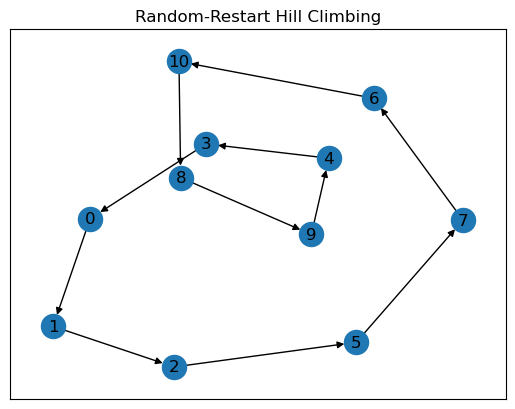

In [72]:
#coordinate of the points/cities
coordinate = np.array([[1, 2], [1, 4], [2, 6], [7, 3], [8, 1], [8, 12], [13, 24], [15, 16], [20, 5], [18, 4], [21, 22]])

best_solution, best_path, time_complexity, space_complexity = random_restart_hill_climbing(coordinate, 100)

print("The best path is \n", best_solution)
print("The length of the best path is ", best_path)
print("Time Complexity: ", time_complexity)
print("Space Complexity: ", space_complexity)

draw_graph(best_solution, "Random-Restart Hill Climbing")

# Stochastic

In [58]:
import random
import numpy as np

In [59]:
#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)):
            #print(coordinate[i])
            p = np.linalg.norm(coordinate[i] - coordinate[j])    # Euclidean Distance --> (abs(a)**2 + abs(a)**2 + ...)**(1/2)
            #print(p)
            matrix.append(p)      # 1 * 11 size (row x col)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))    # 11 x 11 size
    print(matrix)
    return matrix

#finds a random solution
def solution(matrix):
    points = list(range(0, len(matrix)))    #  1 x 11 size (row x col), values starting from zero
    print("Inside Solution")
    random.shuffle(points)
    print("Shuffled Points: ", points)
    return points


# calculate the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]] # matrix[solution[0]][solution[-1]], matrix[solution[1]][solution[0]]
    return cycle_length

# avoid plateaus
def stochastic_neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)
    
    # Select a random neighbor that is an improvement over the current state
    improved_neighbors = [neighbor for neighbor in neighbors if path_length(matrix, neighbor) < path_length(matrix, solution)]
    if improved_neighbors:
        return random.choice(improved_neighbors), path_length(matrix, random.choice(improved_neighbors))
    else:
        return solution, path_length(matrix, solution)



def stochastic_hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)

    current_solution = solution(matrix) # shuffle points
    current_path = path_length(matrix, current_solution)
    print("Path Length ", current_path)

    time_complexity = 0
    space_complexity = len(current_solution)

    neighbor, neighbor_path = stochastic_neighbors(matrix, current_solution)

    while neighbor_path < current_path:
        current_solution = neighbor
        current_path = neighbor_path
        neighbor, neighbor_path = stochastic_neighbors(matrix, current_solution)

        time_complexity += 1
        space_complexity = max(space_complexity, len(neighbor))

    return current_solution, current_path, time_complexity, space_complexity


[[ 0.          2.          4.12310563  6.08276253  7.07106781 12.20655562
  25.05992817 19.79898987 19.23538406 17.11724277 28.28427125]
 [ 2.          0.          2.23606798  6.08276253  7.61577311 10.63014581
  23.32380758 18.43908891 19.02629759 17.         26.90724809]
 [ 4.12310563  2.23606798  0.          5.83095189  7.81024968  8.48528137
  21.09502311 16.40121947 18.02775638 16.1245155  24.8394847 ]
 [ 6.08276253  6.08276253  5.83095189  0.          2.23606798  9.05538514
  21.84032967 15.26433752 13.15294644 11.04536102 23.60084744]
 [ 7.07106781  7.61577311  7.81024968  2.23606798  0.         11.
  23.53720459 16.55294536 12.64911064 10.44030651 24.69817807]
 [12.20655562 10.63014581  8.48528137  9.05538514 11.          0.
  13.          8.06225775 13.89244399 12.80624847 16.40121947]
 [25.05992817 23.32380758 21.09502311 21.84032967 23.53720459 13.
   0.          8.24621125 20.24845673 20.61552813  8.24621125]
 [19.79898987 18.43908891 16.40121947 15.26433752 16.55294536  8.

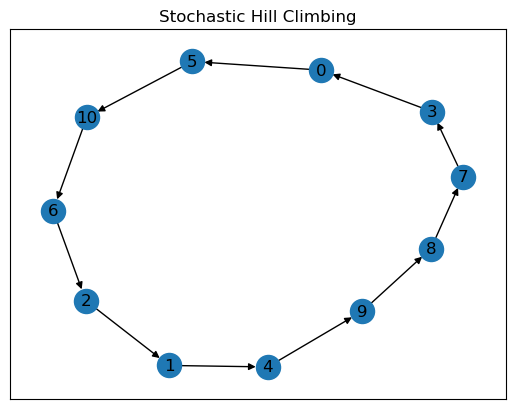

In [60]:
#coordinate of the points/cities
coordinate = np.array([[1, 2], [1, 4], [2, 6], [7, 3], [8, 1], [8, 12], [13, 24], [15, 16], [20, 5], [18, 4], [21, 22]])

best_solution, best_path, time_complexity, space_complexity = stochastic_hill_climbing(coordinate)

print("The best path is \n", best_solution)
print("The length of the best path is ", best_path)
print("Time Complexity: ", time_complexity)
print("Space Complexity: ", space_complexity)

draw_graph(best_solution, "Stochastic Hill Climbing")

# Simulating annealing

In [79]:
import random
import numpy as np
import math

In [80]:
#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)):
            #print(coordinate[i])
            p = np.linalg.norm(coordinate[i] - coordinate[j])    # Euclidean Distance --> (abs(a)**2 + abs(a)**2 + ...)**(1/2)
            #print(p)
            matrix.append(p)      # 1 * 11 size (row x col)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))    # 11 x 11 size
    print(matrix)
    return matrix

#finds a random solution
def solution(matrix):
    points = list(range(0, len(matrix)))    #  1 x 11 size (row x col), values starting from zero
    print("Inside Solution")
    random.shuffle(points)
    print("Shuffled Points: ", points)
    return points


# calculate the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]] # matrix[solution[0]][solution[-1]], matrix[solution[1]][solution[0]]
    return cycle_length

# generate neighbors of the random solution by swapping cities and returns the best neighbor
def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)
    print(len(neighbors)) # num of rows
    num_cols = len(neighbors[0]) if neighbors else 0
    print(num_cols)
    # assume that the first neighbor in the list is the best neighbor
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)

    #check if there is a better neighbor
    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path



def simulated_annealing(coordinate, initial_temperature, cooling_rate):
    matrix = generate_matrix(coordinate)

    current_solution = solution(matrix) # shuffle points
    current_path = path_length(matrix, current_solution)
    print("Initial Path Length ", current_path)

    best_solution = current_solution
    best_path = current_path

    T = initial_temperature

    time_complexity = 0
    space_complexity = len(current_solution)

    while T > 1:
        neighbor = neighbors(matrix, current_solution)[0]
        neighbor_path = path_length(matrix, neighbor)

        if neighbor_path < best_path:
            best_solution = neighbor
            best_path = neighbor_path

        if neighbor_path < current_path or random.uniform(0, 1) < math.exp((current_path - neighbor_path) / T):
            current_solution = neighbor
            current_path = neighbor_path

        T *= cooling_rate

        time_complexity += 1
        space_complexity = max(space_complexity, len(neighbor))

    return best_solution, best_path, time_complexity, space_complexity





[[ 0.          2.          4.12310563  6.08276253  7.07106781 12.20655562
  25.05992817 19.79898987 19.23538406 17.11724277 28.28427125]
 [ 2.          0.          2.23606798  6.08276253  7.61577311 10.63014581
  23.32380758 18.43908891 19.02629759 17.         26.90724809]
 [ 4.12310563  2.23606798  0.          5.83095189  7.81024968  8.48528137
  21.09502311 16.40121947 18.02775638 16.1245155  24.8394847 ]
 [ 6.08276253  6.08276253  5.83095189  0.          2.23606798  9.05538514
  21.84032967 15.26433752 13.15294644 11.04536102 23.60084744]
 [ 7.07106781  7.61577311  7.81024968  2.23606798  0.         11.
  23.53720459 16.55294536 12.64911064 10.44030651 24.69817807]
 [12.20655562 10.63014581  8.48528137  9.05538514 11.          0.
  13.          8.06225775 13.89244399 12.80624847 16.40121947]
 [25.05992817 23.32380758 21.09502311 21.84032967 23.53720459 13.
   0.          8.24621125 20.24845673 20.61552813  8.24621125]
 [19.79898987 18.43908891 16.40121947 15.26433752 16.55294536  8.

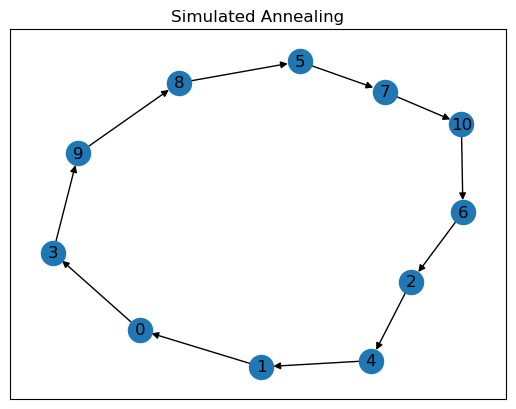

In [78]:
#coordinate of the points/cities
coordinate = np.array([[1, 2], [1, 4], [2, 6], [7, 3], [8, 1], [8, 12], [13, 24], [15, 16], [20, 5], [18, 4], [21, 22]])

best_solution, best_path, time_complexity, space_complexity = simulated_annealing(coordinate, 10000, 0.003)

print("The best path is \n", best_solution)
print("The length of the best path is ", best_path)
print("Time Complexity: ", time_complexity)
print("Space Complexity: ", space_complexity)

draw_graph(best_solution, "Simulated Annealing")

# Local Beam

In [73]:
import random
import numpy as np

In [74]:
#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)):
            #print(coordinate[i])
            p = np.linalg.norm(coordinate[i] - coordinate[j])    # Euclidean Distance --> (abs(a)**2 + abs(a)**2 + ...)**(1/2)
            #print(p)
            matrix.append(p)      # 1 * 11 size (row x col)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))    # 11 x 11 size
    print(matrix)
    return matrix

#finds a random solution
def solution(matrix):
    points = list(range(0, len(matrix)))    #  1 x 11 size (row x col), values starting from zero
    print("Inside Solution")
    random.shuffle(points)
    print("Shuffled Points: ", points)
    return points


# calculate the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]] # matrix[solution[0]][solution[-1]], matrix[solution[1]][solution[0]]
    return cycle_length

# generate neighbors of the random solution by swapping cities and returns the best neighbor
def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)
    return neighbors


def local_beam_search(coordinate, k):
    matrix = generate_matrix(coordinate)

    # Initialize k random states (solutions)
    solutions = [solution(matrix) for _ in range(k)]
    solution_paths = [path_length(matrix, sol) for sol in solutions]

    time_complexity = 0
    space_complexity = len(solutions)

    while True:
        # Generate all neighbors of all current solutions
        all_neighbors = []
        for sol in solutions:
            sol_neighbors = neighbors(matrix, sol)
            all_neighbors.extend(sol_neighbors)  

        time_complexity += len(all_neighbors)
        space_complexity = max(space_complexity, len(all_neighbors))

        # Keep the k best neighbors
        all_neighbors.sort(key=lambda sol: path_length(matrix, sol))
        solutions = all_neighbors[:k]
        solution_paths = [path_length(matrix, sol) for sol in solutions]

        # If there's no improvement, break
        if solution_paths[0] >= min(solution_paths):
            break

    # Return the best solution found
    return solutions[0], solution_paths[0], time_complexity, space_complexity



[[ 0.          2.          4.12310563  6.08276253  7.07106781 12.20655562
  25.05992817 19.79898987 19.23538406 17.11724277 28.28427125]
 [ 2.          0.          2.23606798  6.08276253  7.61577311 10.63014581
  23.32380758 18.43908891 19.02629759 17.         26.90724809]
 [ 4.12310563  2.23606798  0.          5.83095189  7.81024968  8.48528137
  21.09502311 16.40121947 18.02775638 16.1245155  24.8394847 ]
 [ 6.08276253  6.08276253  5.83095189  0.          2.23606798  9.05538514
  21.84032967 15.26433752 13.15294644 11.04536102 23.60084744]
 [ 7.07106781  7.61577311  7.81024968  2.23606798  0.         11.
  23.53720459 16.55294536 12.64911064 10.44030651 24.69817807]
 [12.20655562 10.63014581  8.48528137  9.05538514 11.          0.
  13.          8.06225775 13.89244399 12.80624847 16.40121947]
 [25.05992817 23.32380758 21.09502311 21.84032967 23.53720459 13.
   0.          8.24621125 20.24845673 20.61552813  8.24621125]
 [19.79898987 18.43908891 16.40121947 15.26433752 16.55294536  8.

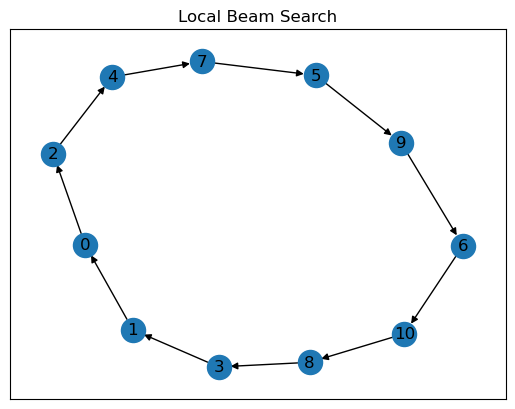

In [75]:
#coordinate of the points/cities
coordinate = np.array([[1, 2], [1, 4], [2, 6], [7, 3], [8, 1], [8, 12], [13, 24], [15, 16], [20, 5], [18, 4], [21, 22]])

best_solution, best_path, time_complexity, space_complexity = local_beam_search(coordinate, 10)

print("The best path is \n", best_solution)
print("The length of the best path is ", best_path)
print("Time Complexity: ", time_complexity)
print("Space Complexity: ", space_complexity)

draw_graph(best_solution, "Local Beam Search")

# <center>~THE END~</center>